# Poverty Level Prediction

Team members: 

Rebecca Liu  && Zoe Wang

# Introduction


The dataset is from kaggle competition about the poverty prediciton, including the train and test datasets.

The prediciton is conducted as the following steps:

1.Read and clean the data. (done by Zeo and Rebecca)

Firstly, we look at the column types and deal with the object columns. Then, we check the conflics in the data and deal with the wrong data. Lastly, we deal with the missing values. 


2.Do the basic data exploration(EDA) using pandas, matplotlib and Seaborn. (mainly by Zoe)

3.Prediction and evaluation with kNN classification，NB and LightBGM without feature selection. (mainly by Rebecca)

4.Prediction and evaluation affer feaure seleciton. (done by Zoe and Rebecca)

5.Conlusion. Throug the above evaluation, do the comparasion and choose the most accurate one.



# 1 Read and clean the data

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'g'

In [5]:
pd.options.display.max_columns = 150

# Read in data
train = pd.read_csv('.../Project3/datasets/train.csv')
test = pd.read_csv('.../Project3/datasets/test.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


## 1.1 Deal with object columns

In [8]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


According to the data discriptions, change yes to 1, no to 0.

dependency: Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

edjefe: years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

edjefa: years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

In [9]:
mapping = {"yes": 1, "no": 0}

# Apply same operation to both train and test
for df in [train, test]:
    # Fill in the values with the correct mapping
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


In [10]:
# Add null Target column to test
test['Target'] = np.nan

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(11), int64(130), object(2)
memory usage: 10.4+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 143 entries, Id to Target
dtypes: float64(12), int64(129), object(2)
memory usage: 26.0+ MB


## 1.2 Deal with wrong data

We have 4 targets, first let us see the distribution of them.

In [13]:
# Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

train[train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

There are 85 households where the family members do not all have the same target.


,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [14]:
#Change the members' target to the same one as host's target
for household in not_equal.index:
    # Find the correct label (for the head of household)
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
     # Set the correct label for all members in the household
    train.loc[train['idhogar'] == household, 'Target'] = true_target
    

There are some households without a host

In [15]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [16]:
# Find households without a head and where labels are different
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different labels.'.format(sum(households_no_head_equal == False)))

0 Households with no head have different labels.


## 1.3 Deal wiht missing value

In [17]:
# Number of missing in each column
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})
# Create a percentage missing
missing['percent'] = missing['total'] / len(train)
missing.sort_values('percent', ascending = False).head(10)

,total,percent
rez_esc,7928,0.829549
v18q1,7342,0.768233
v2a1,6860,0.717798
SQBmeaned,5,0.000523
meaneduc,5,0.000523
Id,0,0.000000
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


In [18]:
# Number of missing in each column
missing = pd.DataFrame(test.isnull().sum()).rename(columns = {0: 'total'})
# Create a percentage missing
missing['percent'] = missing['total'] / len(test)
missing.sort_values('percent', ascending = False).head(10)

,total,percent
Target,23856,1.000000
rez_esc,19653,0.823818
v18q1,18126,0.759809
v2a1,17403,0.729502
SQBmeaned,31,0.001299
meaneduc,31,0.001299
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


### 1.3.1 v18q1 

number of tablets household owns. So we fill null to 0.

In [19]:
train['v18q1'] = train['v18q1'].fillna(0)
test['v18q1'] = test['v18q1'].fillna(0)

v2a1: Monthly rent payment

Other relevant variables:

tipovivi1, =1 own and fully paid house

tipovivi2, "=1 own,  paying in installments"

tipovivi3, =1 rented

tipovivi4, =1 precarious

tipovivi5, "=1 other(assigned,  borrowed)"


In [20]:
# Variables indicating home ownership
own_variables = [x for x in train if x.startswith('tipo')]
train.loc[train['v2a1'].isnull(), own_variables].sum()

tipovivi1    5911
tipovivi2       0
tipovivi3       0
tipovivi4     163
tipovivi5     786
dtype: int64

### 1.3.2 v2a1

There are 5911 household do not have rent because they have their own house. Fill these nunll with 0.

In [21]:
train.loc[train['v2a1'].isnull(), own_variables].sum()

tipovivi1    5911
tipovivi2       0
tipovivi3       0
tipovivi4     163
tipovivi5     786
dtype: int64

In [22]:
train.loc[(train['tipovivi1'] == 1), 'v2a1'] = 0
test.loc[(test['tipovivi1'] == 1), 'v2a1'] = 0

In [23]:
train.loc[train['v2a1'].isnull(), own_variables].sum()

tipovivi1      0
tipovivi2      0
tipovivi3      0
tipovivi4    163
tipovivi5    786
dtype: int64

In [24]:
test.loc[test['v2a1'].isnull(), own_variables].sum()

tipovivi1       0
tipovivi2       0
tipovivi3       0
tipovivi4     434
tipovivi5    2036
dtype: int64

We have already recognize the 0 value, for the rest, we fill it with the mean value.


In [25]:
m_v2a1=train[(train['tipovivi1'] != 1)]['v2a1'].mean()

train.loc[(train['tipovivi1'] != 1), 'v2a1'] = m_v2a1

In [26]:
m_v2a1=test[(test['tipovivi1'] != 1)]['v2a1'].mean()

test.loc[(test['tipovivi1'] != 1), 'v2a1'] = m_v2a1

In [27]:
# Number of missing in each column
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})
# Create a percentage missing
missing['percent'] = missing['total'] / len(train)
missing.sort_values('percent', ascending = False).head(10)

,total,percent
rez_esc,7928,0.829549
SQBmeaned,5,0.000523
meaneduc,5,0.000523
Id,0,0.000000
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000
idhogar,0,0.000000
hogar_nin,0,0.000000


In [28]:
# Number of missing in each column
missing = pd.DataFrame(test.isnull().sum()).rename(columns = {0: 'total'})
# Create a percentage missing
missing['percent'] = missing['total'] / len(test)
missing.sort_values('percent', ascending = False).head(10)

,total,percent
Target,23856,1.000000
rez_esc,19653,0.823818
SQBmeaned,31,0.001299
meaneduc,31,0.001299
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000
idhogar,0,0.000000
hogar_nin,0,0.000000


### 1.3.3 rez_esc

years behind in school, this variable is only defined for individuals between 7 and 19. If the individual is over 19 and they have a missing value, or if they are younger than 7 and have a missing value we can set it to zero. For anyone else, we'll fill the value to 0.

In [29]:
# If individual is over 19 or younger than 7 and missing years behind, set it to 0
train.loc[((train['age'] > 19) | (train['age'] < 7)) & (train['rez_esc'].isnull()), 'rez_esc'] = 0
test.loc[((test['age'] > 19) | (test['age'] < 7)) & (test['rez_esc'].isnull()), 'rez_esc'] = 0

In [30]:
train['rez_esc'].describe()

count    9207.000000
mean        0.081351
std         0.435008
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: rez_esc, dtype: float64

In [31]:
test['rez_esc'].describe()

count    23045.000000
mean         0.077544
std          0.772522
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         99.000000
Name: rez_esc, dtype: float64

In [32]:
test.loc[test['rez_esc'] > 5, 'rez_esc'] = 5

For the rest, we fill the null value to 0.

In [33]:
train['rez_esc']=train['rez_esc'].fillna(0)
test['rez_esc']=test['rez_esc'].fillna(0)

See what is the situation now

In [34]:
# Number of missing in each column
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})
# Create a percentage missing
missing['percent'] = missing['total'] / len(train)
missing.sort_values('percent', ascending = False).head(10)

,total,percent
SQBmeaned,5,0.000523
meaneduc,5,0.000523
Id,0,0.000000
hogar_mayor,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000
idhogar,0,0.000000
hogar_nin,0,0.000000
hogar_adul,0,0.000000


In [35]:
# Number of missing in each column
missing = pd.DataFrame(test.isnull().sum()).rename(columns = {0: 'total'})
# Create a percentage missing
missing['percent'] = missing['total'] / len(test)
missing.sort_values('percent', ascending = False).head(10)

,total,percent
Target,23856,1.000000
SQBmeaned,31,0.001299
meaneduc,31,0.001299
hogar_mayor,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000
idhogar,0,0.000000
hogar_nin,0,0.000000
hogar_adul,0,0.000000


### 1.3.4 Fill the rest null value to 0

Now we finished the data clean.

In [36]:
train.loc[train.meaneduc.isnull(), "meaneduc"] = 0
train.loc[train.SQBmeaned.isnull(), "SQBmeaned"] = 0

test.loc[test.meaneduc.isnull(), "meaneduc"] = 0
test.loc[test.SQBmeaned.isnull(), "SQBmeaned"] = 0

In [37]:
# Number of missing in each column
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})
# Create a percentage missing
missing['percent'] = missing['total'] / len(train)
missing.sort_values('percent', ascending = False).head(10)

,total,percent
Id,0,0.0
hogar_mayor,0,0.0
parentesco10,0,0.0
parentesco11,0,0.0
parentesco12,0,0.0
idhogar,0,0.0
hogar_nin,0,0.0
hogar_adul,0,0.0
hogar_total,0,0.0
parentesco8,0,0.0


In [38]:
# Number of missing in each column
missing = pd.DataFrame(test.isnull().sum()).rename(columns = {0: 'total'})
# Create a percentage missing
missing['percent'] = missing['total'] / len(test)
missing.sort_values('percent', ascending = False).head(10)

,total,percent
Target,23856,1.0
hogar_mayor,0,0.0
parentesco10,0,0.0
parentesco11,0,0.0
parentesco12,0,0.0
idhogar,0,0.0
hogar_nin,0,0.0
hogar_adul,0,0.0
hogar_total,0,0.0
parentesco8,0,0.0


# 2 EDA

## 2.1 Bar chart of target number

Text(0.5,1,'Bar chart of target number in train set')

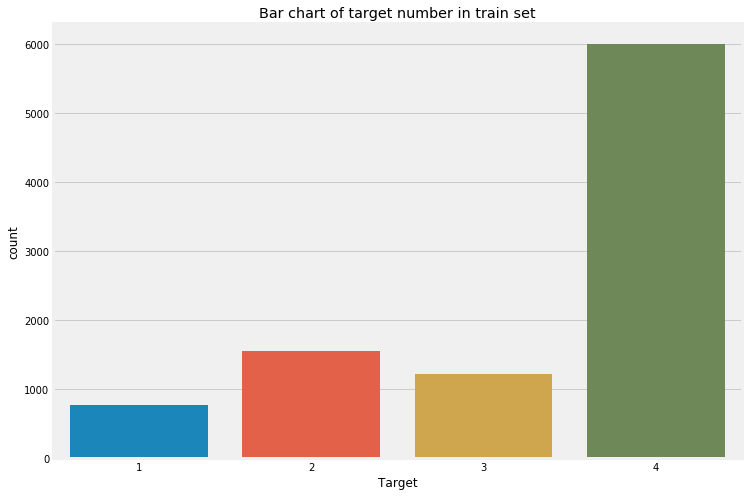

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.countplot(x="Target", data=train);
plt.title("Bar chart of target number in train set")

## 2.2 How monthly rate influence target value

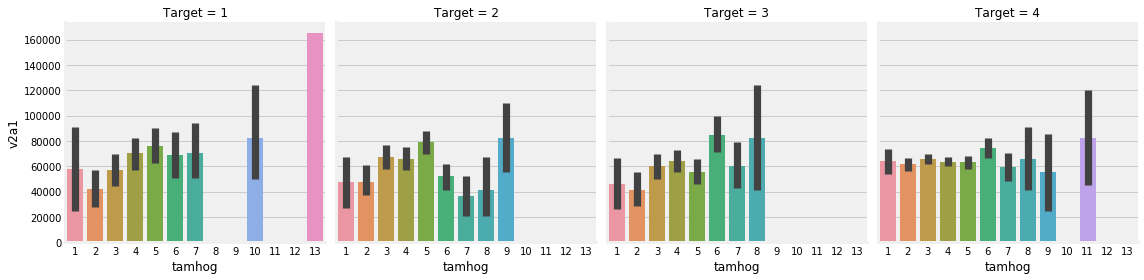

In [37]:
#Mean monthly rate for households with different sizes of household separately by poverty level. tamhog=size of the household v2a1=Monthly rent payment
sns.factorplot(x="tamhog", y="v2a1", col="Target", data=train, kind="bar");

## 2.3 How the SQBmeaned influence target values

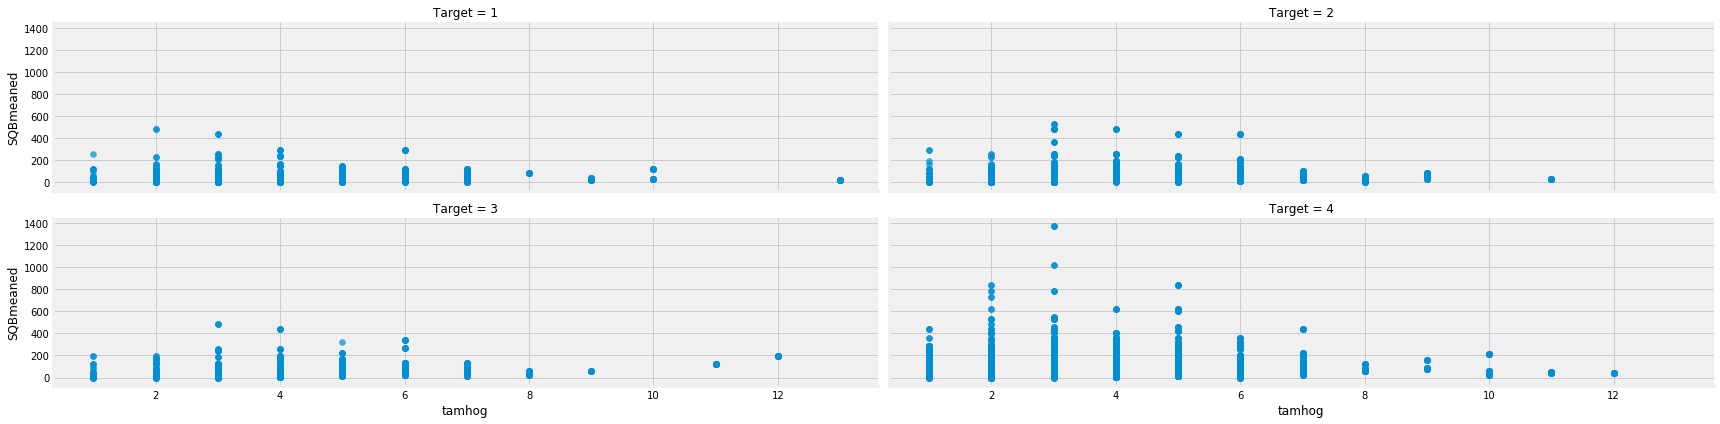

In [38]:
#Size of the household with square of the mean years of education of adults (>=18) in the household separately by poverty level
g = sns.FacetGrid(train, col="Target", aspect=4, col_wrap=2)
g.map(plt.scatter, "tamhog", "SQBmeaned", alpha=.7)

## 2.4 About hacapo,hacdor,rooms,tamhog

hacapo, =1 Overcrowding by rooms

hacdor, =1 Overcrowding by bedrooms

rooms, number of all rooms in the house

tamhog, size of the household

In [39]:
#Check different overcrowding rooms, bedroom and rooms total number
train.groupby('tamhog').agg({'hacapo': 'mean', 'hacdor': 'mean','rooms':'mean'}).style.background_gradient(cmap='Spectral', low=2, high=0.5)

,hacapo,hacdor,rooms
tamhog,,,
1,0,0,4.19689
2,0,0,4.61307
3,0.00797166,0.00531444,4.76174
4,0.00979192,0.0403917,4.92166
5,0.0220126,0.0283019,5.15786
6,0.021978,0.040293,5.34432
7,0.0384615,0.134615,5.92308
8,0.0833333,0.25,5.75
9,0.6,0.3,5.4


It is quite reasonable that the bigger the household size, the higher is the overcrowding rate.

## 2.5 The correlations between features

In [40]:
#Let's find out largest correlations and depict them
corrs = train.corr().abs()
corrs1 = corrs.unstack().drop_duplicates()
strongest = corrs1.sort_values(kind="quicksort", ascending = False)
strongest1 = pd.DataFrame(strongest)
temp = strongest1.index.values
first_cols = [i[0] for i in temp]
second_cols = [j[1] for j in temp]
total_cols_corr = list(set(first_cols[:20] + second_cols[:20]))
strongest.head(25)

v2a1             v2a1               1.000000
                 tipovivi1          1.000000
r4t3             tamhog             0.998107
public           coopele            0.979824
age              SQBage             0.958090
tamhog           SQBhogar_total     0.950173
r4t3             SQBhogar_total     0.948761
meaneduc         SQBmeaned          0.947759
abastaguadentro  abastaguafuera     0.946470
r4t3             tamviv             0.945243
overcrowding     SQBovercrowding    0.945094
dependency       SQBdependency      0.944221
tamhog           tamviv             0.943640
escolari         SQBescolari        0.943325
sanitario2       sanitario3         0.939439
edjefe           SQBedjefe          0.933719
tamviv           SQBhogar_total     0.901396
energcocinar2    energcocinar3      0.901042
hogar_nin        SQBhogar_nin       0.884141
v18q             v18q1              0.849916
elimbasu1        elimbasu3          0.833666
r4h2             r4h3               0.821367
r4m2      

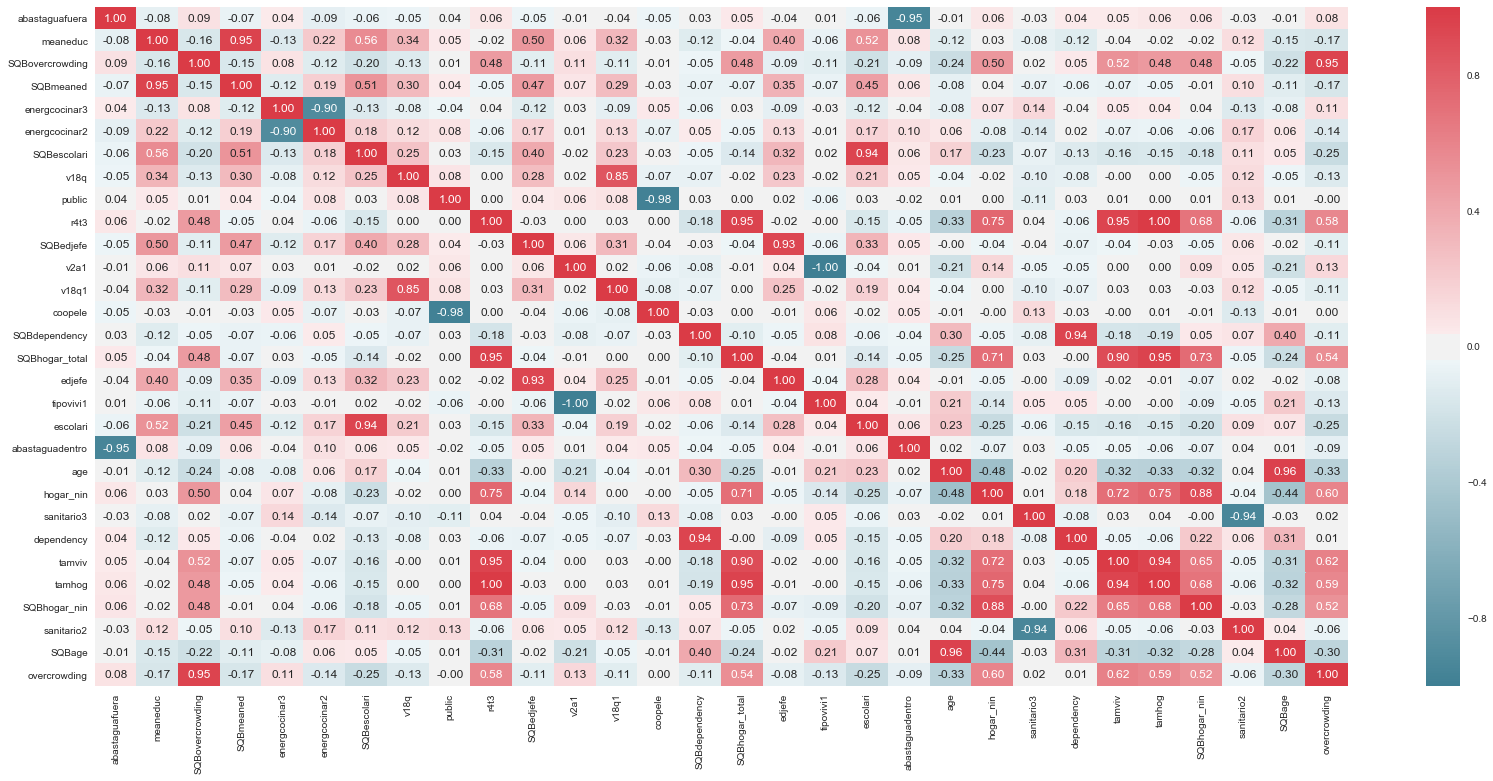

In [41]:
corr = train[total_cols_corr].corr()
sns.set(font_scale=1)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(25, 12.5))
sns.heatmap(corr, cmap=cmap, annot=True, ax=ax, fmt='.2f')

## 2.6 Cluster analysis

In [62]:
kmeantest = train.select_dtypes(exclude=['object'])

In [64]:
from sklearn.cluster import KMeans
k = 3
iteration = 500

model = KMeans(n_clusters=k,n_jobs=4,max_iter=iteration)
model.fit(kmeantest)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [65]:
pd.Series(model.labels_).value_counts()
pd.DataFrame(model.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-2.546585e-09,0.008301,5.252441,0.006348,0.997559,0.970703,0.201172,0.266113,0.105469,1.481934,1.587402,0.117187,1.509277,1.626465,0.222656,2.991211,3.213867,3.201660,3.266602,7.230469,2.081668e-15,3.201660,0.647949,0.080078,0.159668,0.002441,0.103027,0.004883,0.000488,0.001465,0.772461,0.167480,9.765625e-04,8.673617e-18,0.010254,0.048828,0.972656,0.016602,0.002930,0.005859,0.747559,0.970215,0.026367,0.003418,0.887207,1.132991e-17,0.001953,0.110840,0.001953,0.237305,0.755859,0.004395,0.000488,0.002930,0.533691,0.391602,0.071777,0.871582,0.035156,0.090820,0.001953,0.0,0.000488,0.093750,0.294434,0.611816,0.137695,0.273926,0.588379,0.083008,0.221680,0.695312,0.139648,0.464844,0.535156,1.804112e-15,0.089844,0.536133,0.065918,0.091797,0.122070,0.094238,0.596680,0.293457,0.036133,2.914335e-16,0.001953,-1.977585e-15,0.031250,7.812500e-03,0.018555,0.003418,0.006348,0.004395,0.499023,2.702637,0.735840,3.201660,1.743083,4.997070,2.356934,8.343552,0.068848,0.220215,0.312988,0.125000,0.104980,0.005371,0.011719,0.131836,0.019043,2.855469,1.198926,1.000000e+00,2.345346e-15,2.026157e-15,6.036838e-16,-1.859624e-15,0.098633,0.305176,0.936035,2.399902,0.621094,0.095703,0.056152,0.076172,0.082031,0.068848,0.719238,0.280762,63.402832,72.779297,4125.372559,12.946777,51.922852,1.030273,1.797700,10.193324,86.865906,4125.372559,3.377441
1,1.652316e+05,0.053483,4.636314,0.028799,0.993417,0.956116,0.244926,0.345310,0.495337,1.420187,1.915524,0.493966,1.597093,2.091059,0.989303,3.017279,4.006583,3.999451,4.105047,6.956665,9.654416e-02,3.999451,0.576522,0.079813,0.173066,0.015359,0.130828,0.020022,0.001646,0.002743,0.660998,0.240812,-4.846384e-17,2.742732e-03,0.017005,0.078442,0.958859,0.024410,0.002468,0.000549,0.695283,0.966264,0.030444,0.003291,0.909490,5.485464e-04,0.002468,0.086122,0.006034,0.240538,0.736698,0.013714,0.003017,0.002468,0.494789,0.476138,0.026604,0.927043,0.022490,0.047175,0.002468,0.0,0.000823,0.110806,0.337356,0.551838,0.133571,0.282227,0.584202,0.113549,0.256171,0.630280,0.040592,0.481624,0.518376,1.810203e-01,0.165112,0.227921,0.024685,0.065277,0.015085,0.320900,0.306363,0.186231,0.393033,1.618212e-02,0.007405,3.592979e-02,0.007954,1.919912e-03,0.013988,0.004663,0.012342,0.013988,1.651947,2.347504,0.106967,3.999451,1.044742,5.372737,3.134668,9.559080,0.167855,0.164015,0.174712,0.204882,0.107789,0.018376,0.015359,0.128634,0.017553,2.539221,1.745548,-3.430589e-14,2.635765e-01,4.761382e-01,4.470653e-02,2.155787e-01,0.098190,0.272628,0.984641,2.786890,0.622326,0.077071,0.074602,0.071311,0.080636,0.074054,0.780033,0.219967,28.629457,71.837630,1174.447888,18.814043,59.195008,4.660176,3.802918,2.649884,110.365888,1174.447888,3.310477
2,-2.997695e-09,0.039348,5.099405,0.027958,0.994564,0.952110,0.235568,0.338079,0.431271,1.731297,2.162568,0.459229,1.803521,2.262749,0.890500,3.534817,4.425317,4.421434,4.523686,7.414186,1.027699e-01,4.421434,0.581931,0.074553,0.217189,0.005436,0.107947,0.010872,0.001812,0.000259,0.680559,0.235309,1.812063e-03,-8.413409e-17,0.019156,0.063163,0.979291,0.011908,0.003883,0.001812,0.623350,0.960393,0.035724,0.003883,0.860989,2.588662e-04,0.002071,0.134093,0.002848,0.176547,0.794719,0.022780,0.003106,0.000777,0.461300,0.477090,0.060834,0.846751,0.034429,0.116490,0.000259,0.0,0.002071,0.099146,0.335491,0.565364,0.118561,0.301061,0.580378,0.098887,0.266114,0.634999,0.030028,0.494952,0.505048,1.700751e-01,0.101476,0.164639,0.020709,0.045043,0.003106,0.494952,0.164121,0.123997,0.554491,1.475537e-02,0.015532,9.267409e-02,0.000777,-1.192622e-16,0.009837,0.001553,0.016309

In [70]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [74]:
tsne = TSNE(learning_rate=100)
tsne.fit_transform(kmeantest)
data =pd.DataFrame(tsne.embedding_, index=kmeantest.index)

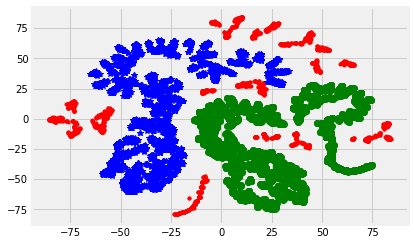

In [75]:
d = data[model.labels_==0]
plt.plot(d[0],d[1],'r.')
d = data[model.labels_==1]
plt.plot(d[0],d[1],'go')
d = data[model.labels_==2]
plt.plot(d[0],d[1],'b*')
plt.show()

# 3 Prediction and evaluation without feature selection

## 3.1 NB with no feature selection

### 3.1.1 Prediction

In [39]:
train.select_dtypes('object').head()

,Id,idhogar
0,ID_279628684,21eb7fcc1
1,ID_f29eb3ddd,0e5d7a658
2,ID_68de51c94,2c7317ea8
3,ID_d671db89c,2b58d945f
4,ID_d56d6f5f5,2b58d945f


In [40]:
col_drop=['Id','idhogar','SQBmeaned','meaneduc','Target']
train_col = list((train.columns).difference(col_drop))
test_col = list((test.columns).difference(col_drop))
len(train_col)

138

In [41]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [42]:
X = pd.DataFrame(train,columns = train_col)
X_test = pd.DataFrame(test,columns = test_col)
y = train['Target']

In [43]:
X_o = train
X_test_o=test

In [428]:
nb.fit(X, y)


GaussianNB(priors=None)

In [44]:
X_test.head()

,SQBage,SQBdependency,SQBedjefe,SQBescolari,SQBhogar_nin,SQBhogar_total,SQBovercrowding,abastaguadentro,abastaguafuera,abastaguano,age,agesq,area1,area2,bedrooms,cielorazo,computer,coopele,dependency,dis,edjefa,edjefe,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,epared1,epared2,epared3,escolari,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,female,hacapo,hacdor,hhsize,hogar_adul,hogar_mayor,hogar_nin,hogar_total,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,male,mobilephone,noelec,overcrowding,paredblolad,pareddes,paredfibras,paredmad,paredother,paredpreb,paredzinc,paredzocalo,parentesco1,parentesco10,parentesco11,parentesco12,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,pisocemento,pisomadera,pisomoscer,pisonatur,pisonotiene,pisoother,planpri,public,qmobilephone,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,refrig,rez_esc,rooms,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,tamhog,tamviv,techocane,techoentrepiso,techootro,techozinc,television,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,v14a,v18q,v18q1,v2a1
0,16,0.25,0,0,1,9,2.25,1,0,0,4,16,1,0,2,1,1,0,0.5,0,17.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,3,2,0,1,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1.5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2,1,1,2,0,1,1,1,2,3,1,0.0,5,0,1,0,0,0,3,3,0,0,0,1,0,1,0,0,0,0,1,0,0.0,0.000000
1,1681,0.25,0,256,1,9,2.25,1,0,0,41,1681,1,0,2,1,1,0,0.5,0,17.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,1,16,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,3,2,0,1,3,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1.5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2,1,1,2,0,1,1,1,2,3,1,0.0,5,0,1,0,0,0,3,3,0,0,0,1,0,1,0,0,0,0,1,0,0.0,0.000000
2,1681,0.25,0,289,1,9,2.25,1,0,0,41,1681,1,0,2,1,1,0,0.5,0,17.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,1,17,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,3,2,0,1,3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1.5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2,1,1,2,0,1,1,1,2,3,1,0.0,5,0,1,0,0,0,3,3,0,0,0,1,0,1,0,0,0,0,1,0,0.0,0.000000
3,3481,0.00,256,256,0,1,1.00,1,0,0,59,3481,1,0,1,1,1,0,0.0,0,0.0,16.0,1,0,0,0,0,0,0,1,0,0,0,0,1,16,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2,0,1,1,0,0,0,0,1,1,1,0.0,14,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1.0,0.000000
4,324,64.00,0,121,1,1,0.25,1,0,0,18,324,1,0,2,1,0,0,8.0,0,11.0,0.0,1,0,0,0,0,0,0,1,0,0,0,1,0,11,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0.5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0.0,4,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1.0,174872.554316


In [430]:
Predict=nb.predict(X_test)
p = list(Predict)

In [431]:
test = pd.read_csv('/data/project3/test.csv')
t = list(test['Id'])

In [432]:
from pandas.core.frame import DataFrame
data=DataFrame(p,t)
data.head()
data = pd.DataFrame([t,p]).T
data = data.rename(columns={0:'Id',1:'Target'})
data.to_csv('/data/nb_noFeature.csv', index=False, header= ['Id','Target'] )

### 3.1.2 Evaluation

Overall accuracy:

In [433]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
print X_train.shape
print X_test.shape

print y_train.shape
print y_test.shape

(7645, 138)
(1912, 138)
(7645,)
(1912,)


In [434]:
classifier_nb = nb.fit(X_train, y_train)
y_pred_nb = classifier_nb.predict(X_test)
y_pred_nb

array([4, 1, 4, ..., 4, 4, 3])

In [435]:
classifier_nb.score(X_test, y_test)

0.6239539748953975

Cross_validation:

In [436]:
from sklearn.cross_validation import cross_val_score
classifier_nb = GaussianNB()
scores_nb = cross_val_score(classifier_nb, X, y, cv=10, scoring='accuracy')
scores_nb.mean()

0.6153691901119429

## 3.2 kNN classification with no fearure selections

### 3.2.1 Prediction

In [437]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean') 
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [438]:
knn_prediciton = knn.predict(X_test)
knn_p = list(knn_prediciton)

In [439]:
data = pd.DataFrame([t,knn_p]).T
data = data.rename(columns={0:'Id',1:'Target'})
data.to_csv('/data/knn_noFeature.csv', index=False, header= ['Id','Target'] )

### 3.2.1 Evaluation

Overall accuracy:

In [440]:
classifier_knn = knn.fit(X_train, y_train)
y_pred_knn = classifier_knn.predict(X_test)
y_pred_knn

array([4, 4, 4, ..., 1, 4, 2])

In [441]:
classifier_knn.score(X_test, y_test)

0.6098326359832636

Cross_validation:

In [442]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
#classifier_knn =KNeighborsClassifier()
scores_knn = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
scores_knn.mean()

0.6013436712728193

### 3.2.3 Find the best k value

In [280]:
import matplotlib.pyplot as plt 
k_range = range(1, 138)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

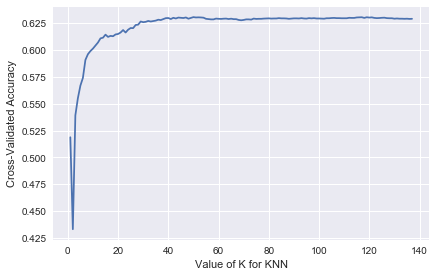

In [281]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

From the above graph we can see that, when k is larger than 40, the score stays at the highest level of around 0.625.

## 3.3 LightBGM without feature selection

### 3.3.1 Prediction 

In [58]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import  make_classification

params = {
'task': 'train',
'boosting_type': 'gbdt',
'objective': 'binary',
'metric': {'l2', 'auc'},
'num_leaves': 31,
'learning_rate': 0.05,
'feature_fraction': 0.9,
'bagging_fraction': 0.8,
'bagging_freq': 5,
'verbose': 0
}

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
clf = lgb.LGBMClassifier(max_depth=-1, learning_rate=0.05, objective='multiclass',
                         random_state=314, silent=True, metric='None', 
                         n_jobs=4, n_estimators=5000, class_weight='balanced')

clf.fit(X, y)
y_pred_no = clf.predict(X_test)
y_pred_no

E:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

### 3.3.2 Evaluation

In [59]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf, X, y, cv =5)
score.mean()

E:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.si

0.5054101870527515

# 4 prediction and evaluation with feature selection using kNN, NB, LightGBM

## 4.1 Univariate feature selection

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [47]:
Predict_new = SelectKBest(chi2, k=40)

train_set = Predict_new.fit_transform(X,y)
test_set = Predict_new.transform(X_test)

print (len(test_set[0]))
print (len(train_set[0]))

40
40


## 4.2 LightBGM

### 4.2.1 Prediction

In [463]:
!pip install --no-binary :all: lightgbm

In [50]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import  make_classification

In [51]:
params = {
'task': 'train',
'boosting_type': 'gbdt',
'objective': 'binary',
'metric': {'l2', 'auc'},
'num_leaves': 31,
'learning_rate': 0.05,
'feature_fraction': 0.9,
'bagging_fraction': 0.8,
'bagging_freq': 5,
'verbose': 0
}

In [52]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
clf = lgb.LGBMClassifier(max_depth=-1, learning_rate=0.05, objective='multiclass',
                         random_state=314, silent=True, metric='None', 
                         n_jobs=4, n_estimators=5000, class_weight='balanced')

In [54]:
clf.fit(train_set, y)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.05,
        max_depth=-1, metric='None', min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=5000,
        n_jobs=4, num_leaves=31, objective='multiclass', random_state=314,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [55]:
y_pred = clf.predict(test_set)
y_pred

E:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([4, 4, 4, ..., 2, 2, 2], dtype=int64)

### 4.2.2 Evaluation

In [56]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf, train_set, y, cv =5)

E:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.si

In [57]:
score.mean()

0.5955593136350394

## 4.3 kNN

### 4.3.1 Prediction and Evaluation

In [63]:
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean') 
knn.fit(train_set, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [67]:
knn_prediciton_after = knn.predict(test_set)
knn_p_after = list(knn_prediciton)

In [68]:
data = pd.DataFrame([t,knn_p_after]).T
data = data.rename(columns={0:'Id',1:'Target'})
data.to_csv('/data/knn_FeatureSlection.csv', index=False, header= ['Id','Target'] )

In [160]:
from sklearn.cross_validation import cross_val_score
scores_nb = cross_val_score(knn, train_set, y, cv=10, scoring='accuracy')
scores_nb.mean()

0.6016591176595621

### 4.3.2 Find best K value

In [86]:
import matplotlib.pyplot as plt 
k_range = range(1, 30)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_set, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

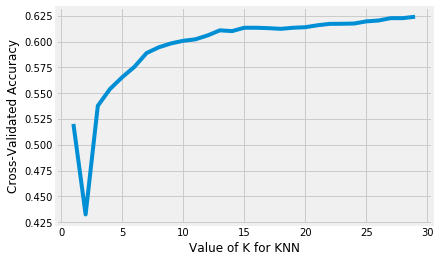

In [89]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## 4.4 NB

### 4.4.1 Prediciton

In [162]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [163]:
nb.fit(train_set, y)

GaussianNB(priors=None)

In [164]:
Predict=nb.predict(test_set)
p = list(Predict)

In [165]:
test = pd.read_csv('/data/project3/test.csv')
t = list(test['Id'])

In [166]:
from pandas.core.frame import DataFrame
data=DataFrame(p,t)
data.head()
data = pd.DataFrame([t,p]).T
data = data.rename(columns={0:'Id',1:'Target'})
data.to_csv('/data/nb_Feature_selection.csv', index=False, header= ['Id','Target'] )

### 4.4.2 Evaluation

In [167]:
from sklearn.cross_validation import cross_val_score
classifier_nb = GaussianNB()
scores_nb = cross_val_score(classifier_nb, train_set, y, cv=10, scoring='accuracy')
scores_nb.mean()

0.6082553307825654

# 5 Conclution

We use three algorithms to do the prediciton, KNN, NB, LightBGM. Their accurcies are close to each other. We also so do univariate feature selection, and compare acurrcy with no feature selection. With 40 selected features, there is not too much difference.Among all the acurrcies we have got, the hightest one belongs to NB with no feature selection.